In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic.csv')

In [4]:
train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
train.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [7]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [8]:
train['age'] = train[['age','pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

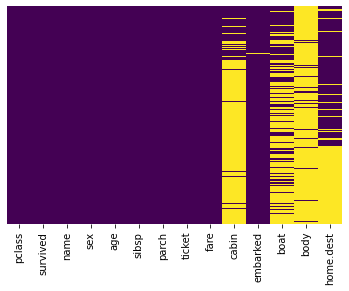

In [9]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
display(train.head())
display(train.info())
sex = pd.get_dummies(train['sex'],drop_first=True)
embark = pd.get_dummies(train['embarked'],drop_first=True)
train.drop(['name','sex', 'ticket','cabin','embarked','boat','body','home.dest'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)
train.dropna(inplace=True)
display(train.head())

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1310 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


None

,pclass,survived,age,sibsp,parch,fare,male,Q,S
0,1.0,1.0,29.0000,0.0,0.0,211.3375,0,0,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1,0,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,0,0,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,1,0,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,0,0,1


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('survived',axis=1), 
                                                    train['survived'], test_size=0.30, 
                                                    random_state=101)


In [12]:
X_train.info()
X_test.info() 
y_train
y_test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915 entries, 384 to 863
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  915 non-null    float64
 1   age     915 non-null    float64
 2   sibsp   915 non-null    float64
 3   parch   915 non-null    float64
 4   fare    915 non-null    float64
 5   male    915 non-null    uint8  
 6   Q       915 non-null    uint8  
 7   S       915 non-null    uint8  
dtypes: float64(5), uint8(3)
memory usage: 45.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 931 to 692
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  393 non-null    float64
 1   age     393 non-null    float64
 2   sibsp   393 non-null    float64
 3   parch   393 non-null    float64
 4   fare    393 non-null    float64
 5   male    393 non-null    uint8  
 6   Q       393 non-null    uint8  
 7   S       393 non-null    uint8

931     0.0
254     1.0
583     1.0
568     0.0
483     1.0
       ... 
846     0.0
1246    0.0
1183    0.0
68      1.0
692     0.0
Name: survived, Length: 393, dtype: float64

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logmodel = LogisticRegression()
display(X_train.head())

,pclass,age,sibsp,parch,fare,male,Q,S
384,2.0,29.0,0.0,0.0,0.0000,1,0,1
597,2.0,29.0,0.0,0.0,13.0000,1,0,1
626,3.0,38.0,4.0,2.0,7.7750,0,0,1
917,3.0,39.0,0.0,1.0,13.4167,1,0,0
544,2.0,34.0,1.0,0.0,21.0000,1,0,1


In [15]:
logmodel.fit(X_train,y_train)

C:\Users\kkhan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
from sklearn.metrics import classification_report

In [18]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       240
         1.0       0.75      0.69      0.72       153

    accuracy                           0.79       393
   macro avg       0.78      0.77      0.78       393
weighted avg       0.79      0.79      0.79       393

